In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset= "advertising_sales_data.xlsx"
df = pd.read_excel(dataset)


In [8]:
x = df.iloc[:,1:-1].values
y = df.iloc[:,-1]

In [9]:
import numpy as np
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(x[:, [1]])
x[:, [1]] = imputer.transform(x[:, [1]])
print(x)


[[230.1         37.8         69.2       ]
 [ 44.5         39.3         45.1       ]
 [ 17.2         45.9         69.3       ]
 [151.5         41.3         58.5       ]
 [180.8         10.8         58.4       ]
 [  8.7         48.9         75.        ]
 [ 57.5         32.8         23.5       ]
 [120.2         19.6         11.6       ]
 [  8.6          2.1          1.        ]
 [199.8          2.6         21.2       ]
 [ 66.1          5.8         24.2       ]
 [214.7         24.           4.        ]
 [ 23.8         35.1         65.9       ]
 [ 97.5          7.6          7.2       ]
 [204.1         32.9         46.        ]
 [195.4         47.7         52.9       ]
 [ 67.8         36.6        114.        ]
 [281.4         39.6         55.8       ]
 [ 69.2         20.5         18.3       ]
 [147.3         23.26060606  19.1       ]
 [218.4         27.7         53.4       ]
 [237.4          5.1         23.5       ]
 [ 13.2         15.9         49.6       ]
 [228.3         16.9         26.2 

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [11]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()  # Using MinMaxScaler for Normalization
x_train = sc.fit_transform(x_train)  # Fit and transform training data
x_test = sc.transform(x_test)

In [12]:
print(x_train)

[[0.04193439 0.00809717 0.25149105]
 [0.30334799 0.00607287 0.22763419]
 [0.06087251 0.24493927 0.22962227]
 [0.68785932 0.6659919  0.45427435]
 [0.02231992 0.56882591 0.40854871]
 [0.49577274 0.47086247 0.18687873]
 [0.26208996 0.94736842 0.33996024]
 [0.76868448 0.76315789 0.31510934]
 [0.69090294 0.91295547 0.19184891]
 [0.77375719 0.65384615 0.73459245]
 [0.9773419  0.8562753  0.50596421]
 [0.41393304 0.70040486 0.12027833]
 [0.06323977 0.32388664 0.21868787]
 [0.61515049 0.93522267 0.5805169 ]
 [0.89584038 0.4048583  0.        ]
 [0.55765979 0.20242915 0.17196819]
 [0.73655732 0.10931174 0.2693837 ]
 [0.08217788 0.22267206 0.29224652]
 [0.78254988 0.17408907 0.08349901]
 [0.14305039 0.5242915  0.20079523]
 [0.46838011 0.28947368 0.25149105]
 [0.4687183  0.29352227 0.09840954]
 [0.01589449 0.60526316 0.09045726]
 [0.99053094 0.56072874 0.01491054]
 [0.94927291 0.80161943 0.55168986]
 [0.02705445 0.98987854 0.74254473]
 [0.26885357 0.         0.08846918]
 [0.46398377 0.93927126 0.58

In [13]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [14]:
y_test_pred=regressor.predict(x_test)
y_train_pred = regressor.predict(x_train)

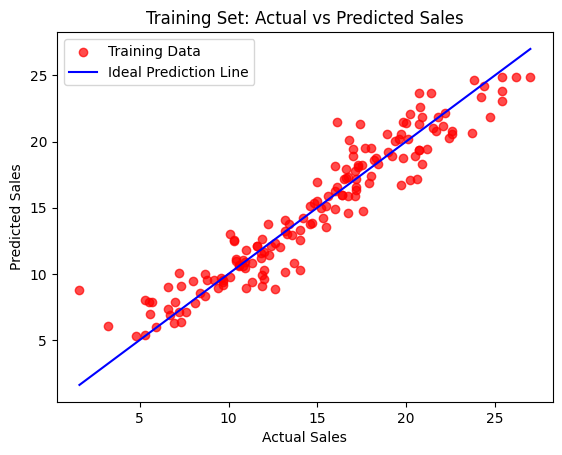

In [15]:
plt.scatter(y_train, y_train_pred, color="red", alpha=0.7, label="Training Data")
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color="blue", linestyle="-", label="Ideal Prediction Line")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Training Set: Actual vs Predicted Sales")
plt.legend()
plt.show()

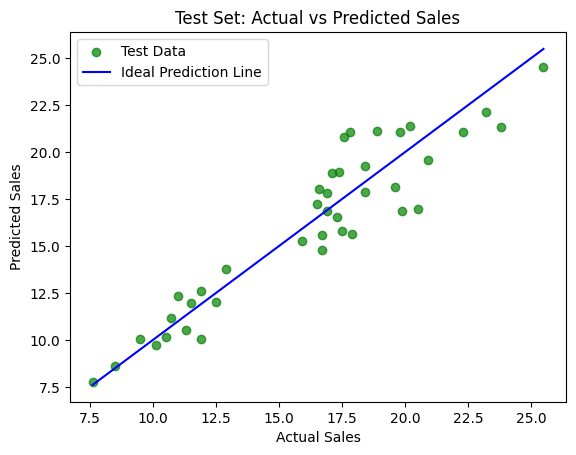

In [16]:
plt.scatter(y_test, y_test_pred, color="green", alpha=0.7, label="Test Data")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="blue", linestyle="-", label="Ideal Prediction Line")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Test Set: Actual vs Predicted Sales")
plt.legend()
plt.show()

In [17]:
new_ad_budget = np.array([[200, 40, 50]])
new_ad_budget_scaled = sc.transform(new_ad_budget)
predicted_sales = regressor.predict(new_ad_budget_scaled)
print(f"Predicted Sales: {predicted_sales[0]:.2f}")

Predicted Sales: 19.73


In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Compute metrics for test set
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print results
print("Training Performance:")
print(f"Mean Squared Error: {mse_train:.2f}")
print(f"Root Mean Squared Error: {rmse_train:.2f}")
print(f"Mean Absolute Error: {mae_train:.2f}")
print(f"R² Score: {r2_train:.2f}")

print("\nTest Performance:")
print(f"Mean Squared Error: {mse_test:.2f}")
print(f"Root Mean Squared Error: {rmse_test:.2f}")
print(f"Mean Absolute Error: {mae_test:.2f}")
print(f"R² Score: {r2_test:.2f}")

Training Performance:
Mean Squared Error: 2.79
Root Mean Squared Error: 1.67
Mean Absolute Error: 1.24
R² Score: 0.91

Test Performance:
Mean Squared Error: 2.41
Root Mean Squared Error: 1.55
Mean Absolute Error: 1.28
R² Score: 0.87


In [21]:
x_train_reduced = x_train[:, [1, 2]]  # Selecting only Radio and Newspaper
x_test_reduced = x_test[:, [1, 2]]

# Train a new regression model
regressor_reduced = LinearRegression()
regressor_reduced.fit(x_train_reduced, y_train)

# Predict using the reduced model
y_pred_reduced = regressor_reduced.predict(x_test_reduced)

# Evaluate performance
from sklearn.metrics import mean_squared_error, r2_score
mse_reduced = mean_squared_error(y_test, y_pred_reduced)
r2_reduced = r2_score(y_test, y_pred_reduced)

print(f"Reduced Model MSE: {mse_reduced:.2f}")
print(f"Reduced Model R² Score: {r2_reduced:.2f}")


Reduced Model MSE: 19.08
Reduced Model R² Score: 0.01
